# Ejercicio 11: Web Scraping

## Objetivo de la práctica

El objetivo de este ejercicio es construir un web scraper que recoja datos de un website.

### Parte 0: Planificar

1. Identificar los datos que quieres obtener.
2. Elegir el sitio web objetivo.
3. Planificar la estructura del corpus.

### Parte 1: Entender el sitio web objetivo



*   Analizar la estructura de la página web a ser analizada.
* Identificar los elementos HTML que contienen los datos bsuscados.



Instalamos requerimientos

In [1]:
!pip install beautifulsoup4 lxml requests

Realizamos las importaciones

In [2]:
from bs4 import BeautifulSoup
import requests
import os


Cargamos el archivo, lo abrimos y lo pasamos a html

<!DOCTYPE html>

<!-- saved from url=(0064)https://www.allrecipes.com/recipe/235997/unstuffed-cabbage-roll/ -->
<html class="comp recipeScTemplate html mntl-html taxlevel-4 no-touchevents is-window-loaded" data-ab="99,99,99,99,99,99,50,99,99,99,77,99,99,99,99,99,99,99,99,58,78,99,64,62" data-allrecipes-resource-version="4.150.0" data-ddm-standard-video="true" data-lazy-offset="200.0" data-mantle-resource-version="4.2.273" data-mm-ads-resource-version="2.2.102" data-mm-digital-issues-resource-version="3.0.15" data-mm-myrecipes-resource-version="3.3.47" data-mm-recipes-resource-version="3.1.13" data-mm-transactional-resource-version="3.1.29" data-mm-video-resource-version="3.0.29" data-resource-version="4.150.0" data-tracking-container="true" id="recipeScTemplate_1-0" lang="en" style="--scrollbar-width: 15px;"><!--
<globe-environment environment="k8s-prod" application="allrecipes" dataCenter="us-east-1"/>
--><link href="./Unstuffed Cabbage Roll Recipe_files/magazinesCom-contextual-modal.
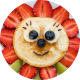
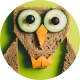
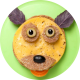
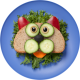
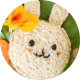

In [3]:
ruta_archivo = "/content/Unstuffed Cabbage Roll Recipe.html"
# Load the HTML file
with open(ruta_archivo, "r", encoding="utf-8") as archivo:
    html_content = archivo.read()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
print(soup)

Extraemos los valores que nos interesan

In [4]:
# Extracting the recipe title
title = soup.find("title")
title.string

'Unstuffed Cabbage Roll Recipe'

In [5]:
# Puntaje
score=soup.find("div", {"id":"mm-recipes-review-bar__rating_1-0"})
score.string


'4.6'

In [6]:
# Descripción
description = soup.find("p", {"class": "article-subheading text-utility-300"})
description.string

"This is an easy casserole made with ground beef, cabbage, garlic, and tomatoes. My kids don't even like cabbage, but they love this dish! Serve with rice for a comforting weeknight dinner. Also, the longer it stands the better it tastes!"

In [7]:
# Tiempo de preparación
preptime = soup.find("div", {"class": "mm-recipes-details__value"})
preptime.string

'15 mins'

In [8]:
# Tiempo de cocción
Cook_Time = soup.find("div", {"class": "mm-recipes-details__value"})
Cook_Time.string

'15 mins'

Creamos una función que nos permita presentar estos datos

In [9]:
def pardearReceta(html_doc):

  soup = BeautifulSoup(html_doc, "html.parser")

  title = soup.find("title")
  score = soup.find("div", {"id":"mm-recipes-review-bar__rating_1-0"})
  description = soup.find("p", {"class": "article-subheading text-utility-300"})
  preptime = soup.find("div", {"class": "mm-recipes-details__value"})

  return {"title": title.string, "description":description.string, "score":score.string, "preptime":preptime.string}

In [10]:
#score
#description
#prep time
#cook time
#total time
#servings
#ingredients
#directions
#nutritions facts
#reviews
pardearReceta(html_content)

{'title': 'Unstuffed Cabbage Roll Recipe',
 'description': "This is an easy casserole made with ground beef, cabbage, garlic, and tomatoes. My kids don't even like cabbage, but they love this dish! Serve with rice for a comforting weeknight dinner. Also, the longer it stands the better it tastes!",
 'score': '4.6',
 'preptime': '15 mins'}

### Parte 2: Obtener los datos deseados

* Buscar dentro del contenido HTML y extraer la información.

In [11]:
ingredients_section = soup.find_all("li", class_="mm-recipes-structured-ingredients__list-item")
for ingredient in ingredients_section:
    print(ingredient.text.strip())

2 pounds ground beef
1 large onion, chopped
1 small head cabbage, chopped
2 (14.5 ounce) cans diced tomatoes
1 (8 ounce) can tomato sauce
½ cup water
2 cloves garlic, minced
2 teaspoons salt
1 teaspoon ground black pepper


In [12]:
# Extracting the description
description = soup.find("meta", {"name": "description"})["content"]

# Extracting the ingredients
ingredients_section = soup.find_all("li", class_="mm-recipes-structured-ingredients__list-item")
ingredients = [ingredient.get_text().strip() for ingredient in ingredients_section]

# Extracting the instructions
instructions_section = soup.find_all("p", class_="comp mntl-sc-block mntl-sc-block-html")
instructions = [instruction.get_text().strip() for instruction in instructions_section]

# Extracting the nutrition information
nutrition_section = soup.find_all("span", class_="mm-recipes-nutrition-facts-label__nutrient-name mm-recipes-nutrition-facts-label__nutrient-name--has-postfix")
nutrition_facts = [fact.parent.get_text().strip().replace('\n', ' ') for fact in nutrition_section]

# Print the extracted information
print("Recipe Title:", title)
print("Description:", description)
print("Ingredients:")
for ingredient in ingredients:
    print("-", ingredient)
print("Instructions:")
for i, instruction in enumerate(instructions, 1):
    print(f"{i}. {instruction}")
print("Nutrition Facts:")
for fact in nutrition_facts:
    print("-", fact)

Recipe Title: <title>Unstuffed Cabbage Roll Recipe</title>
Description: Unstuffed cabbage rolls with ground beef, cabbage, garlic, and tomatoes make a family-pleasing comforting casserole that's perfect for weeknights.
Ingredients:
- 2 pounds ground beef
- 1 large onion, chopped
- 1 small head cabbage, chopped
- 2 (14.5 ounce) cans diced tomatoes
- 1 (8 ounce) can tomato sauce
- ½ cup water
- 2 cloves garlic, minced
- 2 teaspoons salt
- 1 teaspoon ground black pepper
Instructions:
1. This unstuffed cabbage roll dish is a cheap, quick, and easy weeknight dinner you don't want to miss. If you're looking for a simple and hearty casserole that's just as good the next day, you're going to want to add this one to your recipe box.
2. An unstuffed cabbage roll is basically a deconstructed version of a regular casserole. All the traditional cabbage roll ingredients (cabbage, ground beef, tomatoes, other veggies, and spices and seasonings) are cooked together — so you don't have to worry about p

### Parte 3: Obtener enlaces relacionados

* Encontrar links a otras recetas para completar el corpus

In [13]:
# Find all the links to other recipes
recipe_links = soup.find_all("a", href=True)

# Filter and print only the links that are likely to be recipes
recipe_urls = []
for link in recipe_links:
    href = link['href']
    if "recipe" in href:
        recipe_urls.append(href)

# Print the recipe URLs
print("Linked Recipes:")
for url in recipe_urls:
    print(url)

Linked Recipes:
https://www.allrecipes.com/recipe/235997/unstuffed-cabbage-roll/#main
https://www.allrecipes.com/
https://www.allrecipes.com/authentication/login?regSource=3675&relativeRedirectUrl=%2Frecipe%2F235997%2Funstuffed-cabbage-roll%2F
https://www.allrecipes.com/account/add-recipe
https://www.myrecipes.com/favorites
https://www.allrecipes.com/account/settings
https://support.people.inc/hc/en-us/categories/360003648613-Allrecipes
https://www.allrecipes.com/authentication/logout?relativeRedirectUrl=%2Frecipe%2F235997%2Funstuffed-cabbage-roll%2F
https://www.allrecipes.com/recipe/235997/unstuffed-cabbage-roll/#
https://www.allrecipes.com/sweepstakes
https://www.allrecipes.com/
https://www.allrecipes.com/recipes/17562/dinner/
https://www.allrecipes.com/recipes/17057/everyday-cooking/more-meal-ideas/5-ingredients/main-dishes/
https://www.allrecipes.com/recipes/15436/everyday-cooking/one-pot-meals/
https://www.allrecipes.com/recipes/1947/everyday-cooking/quick-and-easy/
https://www.al

### Parte 4: Hacer RAG con las recetas obtenidas

* Una vez que se ha construido el corpus, implementar y desplegar RAG para realizar búsquedas en el corpus

Instalamos librerías necesarias

In [18]:
# Instalamos las librerías base y las extensiones de comunidad necesarias
!pip install -U langchain-text-splitters langchain-huggingface langchain-community faiss-cpu sentence-transformers

Estructuramos el Corpus

In [22]:
# Importaciones actualizadas para la versión actual
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# 1. Preparar el contenido
# 'title' es un objeto de BS4, por eso usa .string
# 'description' ya es un string, por eso se usa directamente
texto_para_corpus = f"Título: {title.string}\n"
texto_para_corpus += f"Descripción: {description}\n"
texto_para_corpus += "Ingredientes:\n" + "\n".join(ingredients) + "\n"
texto_para_corpus += "Instrucciones:\n" + " ".join(instructions)

# 2. Crear el documento base para el RAG
from langchain_core.documents import Document
doc = Document(page_content=texto_para_corpus, metadata={"source": "allrecipes_scraping"})

# 3. Dividir el texto en fragmentos (Chunks)
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents([doc])

# 4. Crear Embeddings y Base de Datos Vectorial
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
vector_db = FAISS.from_documents(chunks, embeddings)

print("¡Éxito! El sistema RAG ha indexado la receta correctamente.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

¡Éxito! El sistema RAG ha indexado la receta correctamente.


Implementar la función de búsqueda

In [23]:
def consultar_receta(pregunta):
    # Buscamos los 2 trozos de texto más parecidos a la pregunta
    docs_relevantes = vector_db.similarity_search(pregunta, k=2)

    contexto = "\n---\n".join([d.page_content for d in docs_relevantes])

    print(f"PREGUNTA: {pregunta}")
    print(f"RESPUESTA RECUPERADA:\n{contexto}")

# --- PRUEBAS DEL RAG ---
consultar_receta("¿Cuáles son los ingredientes principales?")
print("\n" + "="*50 + "\n")
consultar_receta("¿Cuánto tiempo debe hervir el repollo?")

PREGUNTA: ¿Cuáles son los ingredientes principales?
RESPUESTA RECUPERADA:
Título: Unstuffed Cabbage Roll Recipe
Descripción: Unstuffed cabbage rolls with ground beef, cabbage, garlic, and tomatoes make a family-pleasing comforting casserole that's perfect for weeknights.
Ingredientes:
2 pounds ground beef
1 large onion, chopped
1 small head cabbage, chopped
2 (14.5 ounce) cans diced tomatoes
1 (8 ounce) can tomato sauce
½ cup water
2 cloves garlic, minced
2 teaspoons salt
1 teaspoon ground black pepper
Instrucciones:
---
Canned TomatoesTraditional cabbage rolls are topped with a savory tomato-based sauce. To replicate this, use two cans of diced tomatoes and one can of tomato sauce. WaterA half cup of water is enough extra liquid for this recipe. For more flavor, substitute beef broth. SeasoningsThis unstuffed cabbage roll recipe is simply seasoned with garlic, salt, and ground black pepper. Rice (Optional)Though this unstuffed cabbage roll is delicious on its own, you can serve it ove